#### Import cost function defined in costFunctionFormula.py

The particular cost function formula used is the Mean Error Squared formula, defined as: <br />
<img src="https://latex.codecogs.com/png.latex?\frac{1}{2m} \sum_{i=1}^m (f_{w,b}(x_i) - y_i)^2" /> 

In [1]:
from costFunctionFormula import compute_cost

#### Import compute_gradient function.
Gradient is calculated using the following algorithm:
<br/>
##### Until convergence {
<img src="https://latex.codecogs.com/png.latex? w := w - \alpha \frac{1}{m} \sum_{i = 1}^m (f_{w, b}(x^{(i)}) - y^{(i)}) x^{(i)}" />
<img src="https://latex.codecogs.com/png.latex? b := b - \alpha \frac{1}{m} \sum_{i = 1}^m (f_{w, b}(x^{(i)}) - y^{(i)})" />
}

<b>Note</b>: Gradient step formulae are derived taking the partial derivative with respect to w and b of the Mean Error Squared formula shown above

So, first we define a formula for calculating the gradients to then use it in the linear regression algorithm 

In [5]:
from computeGradient import compute_gradient

In [ ]:
With these we can now implement the gradient descent algorithm:

In [75]:
def gradient_descent(x, y, learning_rate, iterations):
    '''
    Input:
        (x, y) training samples
        Learning rate also known as alpha
        Max number of iterations
    Output:
        (w, b, history)
        w & b are the parameters obtained from the algorithm
        History is an array where each element history[i] is the error at the ith iteration. Gradient descent is supposed to minimize the error
    '''
    history = []
    log_step = max(1, iterations // 10) # For logging values into "history" array
    w, b = 0, 0 # Initial values are usually 0
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= learning_rate * dj_dw
        b -= learning_rate * dj_db

        if i % log_step == 0 or i == iterations - 1:
            history.append(compute_cost(x, y, w, b))
    return (w, b, history)

#### Now lets predict housing prices using this algorithm

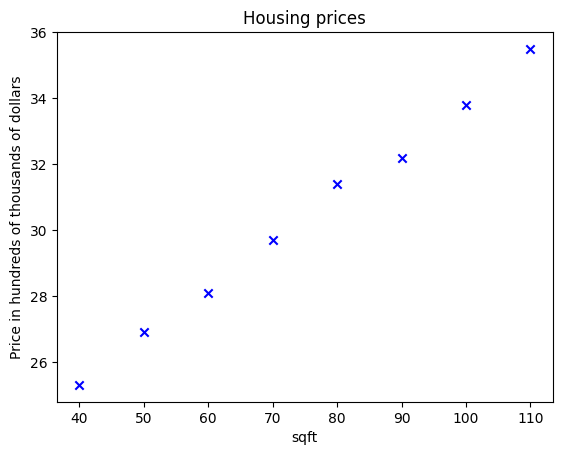

In [83]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([40, 50, 60, 70, 80, 90, 100, 110])
y = np.array([25.3, 26.9, 28.1, 29.7, 31.4, 32.2, 33.8, 35.5])

plt.scatter(x, y, c='b', marker='x')
plt.xlabel("sqft")
plt.ylabel("Price in hundreds of thousands of dollars")
plt.title("Housing prices")
plt.show()

#### What would the price be for a house 75 or 85 sqft house? 
Linear regression finds a line that matches the given dataset, then uses it to predict new values

In [106]:
w, b, history = gradient_descent(x, y, 0.00000001, 100000)

print("Predicted price for a 75sqft house: ", w * 75 + b)
print("Predicted price for a 85sqft house: ", w * 85 + b)

Predicted price for a 75sqft house:  28.62411034149145
Predicted price for a 85sqft house:  32.43981426153994


#### And we can visualize the results (in red)

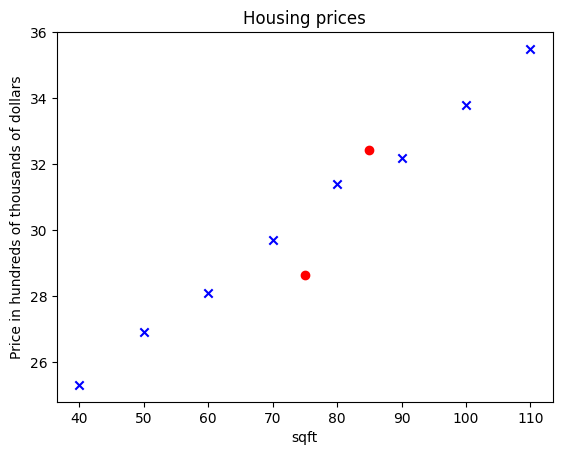

In [107]:
plt.scatter(x, y, c='b', marker='x')
plt.xlabel("sqft")
plt.ylabel("Price in hundreds of thousands of dollars")
plt.title("Housing prices")
plt.scatter(75, w * 75 + b, c='r', marker='o')
plt.scatter(85, w * 85 + b, c='r', marker='o')
plt.show()

#### Here's how the gradient descent algorithm figured out the parameters as iterations went on

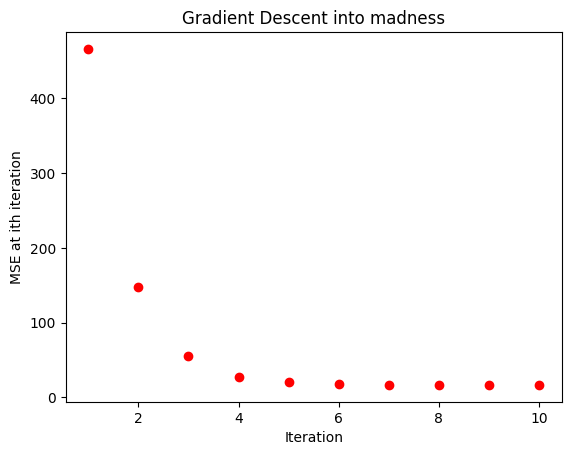

In [108]:
for i in range(10):
    plt.scatter(i + 1, history[i], c='r')
plt.xlabel("Iteration")
plt.ylabel("MSE at ith iteration")
plt.title("Gradient Descent into madness")
plt.show()